<img src="logo-catedra.png" width="400"> <img src="Logo-GIIATa-small.png" width="100"> 
<div style="text-align: right"> _Por: Braulio Castro, Marcela Zhagui_ </div>

# Inteligencia Artificial II

Desarrollar una red neuronal que realice un proceso de clasificación de imágenes (íconos) que representan diferentes categorías.

# 1. El programa debe cargar los íconos del corpus de datos dado, considerando que son imágenes a colores (RGB, Red, Green y Blue) de 32 x 32 pixeles, como se puede apreciar en la Ilustración 1:


|||
|:---:|:---:|
|  <img src="boat.png" width="64"> (a)| <img src="blade.png" width="64"> (b) |
|  <img src="family.png" width="64"> (c) | <img src="building.png" width="64"> (d) |

Ilustración 1. Ejemplos de íconos que representan “botes” (a), “espadas” (b), “familia” (c) y construcción (d).
    
2. Se deberán probar al menos 3 distintas estructuras de redes neuronales y funciones de activación, a fin de determinar cuál fue la mejor alternativa (considerando  número de neuronas, número de capas y funciones de activación). 
3. El programa deberá dividir el corpus de imágenes en dos bloques: entrenamiento (train) y pruebas (test). Asimismo, deberá generar un reporte en formato PDF, Word o similar que contenga la siguiente información:
    * Gráfica de precisión (datos entrenamiento versus datos de prueba), ver Ilustración 2.
    * Gráfica de log loss (función de coste: entropía cruzada), ver Ilustración 3.
    * Comparación de precisión y log loss de las diferentes opciones de red neuronal que ha probado.
    * Matriz de confusión.

![Ilustración 2. ](Figure2.png)

Ilustración 2. Ejemplo de la precisión de la Red Neuronal Artificial durante los procesos de entrenamiento y validación.

![Ilustración 3. xxx](Figure3.png)

Ilustración 3. Ejemplo la curva de función de coste de la Red Neuronal Artificial. Se comparan los resultados del entrenamiento y de la validación.

4. El programa debe tener una función lista para realizar la prueba (test) con un conjunto de datos, en base a un directorio que se le pase (con la misma estructura de directorios que se le facilitaron para el entrenamiento). Esa función generará los siguientes datos en un informe en formato PDF, Word o similar:
    * Gráfica de precisión (datos entrenamiento versus datos de prueba).
    * Gráfica de log loss (función de coste: entropía cruzada).
    * Comparación de precisión y log loss de las diferentes opciones de red neuronal que ha probado.
    * Matriz de confusión.
    
5. Deberá realizar el siguiente análisis en base al proyecto: 
    * Determinar qué configuración de red neuronal fue más efectiva y qué funciones de transferencia tuvieron los mejores resultados.
    * Mostrar cómo afecta el número de neuronas para el problema dado.
    * Indicar qué estrategia de normalización de datos usó y cuál fue la razón de seleccionar dicha estrategia.
    * Indicar qué funcionalidad extra investigó y la incorporó en el proyecto para mejorar la precisión en la clasificación de los íconos.
6. Criterios de evaluación:
    * Correcto funcionamiento del programa, el sistema tiene como mínimo un 83% de precisión en la clasificación de los datos. El programa no sobre-entrena la red. → 60% del puntaje.
    * Emplea correctamente las técnicas de preprocesamiento de datos, así como del diseño de la red neuronal y las diferentes alternativas de configuración  → 20% del puntaje.
    * Aplica nuevas técnicas o extras que ha investigado que permiten mejorar el proceso → 20% del puntaje.    

# Proceso:

In [3]:
##LIBRERIAS
from itertools import repeat
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pp
import pandas as pd
from PIL import Image # Importamos la clase Image de la librería **pillow**
from matplotlib import image
import os
from os import listdir
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow_model_optimization as tfmot

import keras
from keras.models import Sequential #RNA que tiene conexion hacia adelante
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, LeakyReLU #Capas de RNA
import keras.optimizers as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
%matplotlib inline

# 1. El programa debe cargar los íconos del corpus de datos dado, considerando que son imágenes a colores (RGB, Red, Green y Blue) de 32 x 32 pixeles

In [4]:
#Carga de los datos con Numpy
iconos = np.load('./Icons-50.npy', allow_pickle = True).item()
print('Total de Muestras::::::::', len(iconos['image']))

#Dividimos la muestras en entradas y salidas
entrada = iconos['image']
salida = iconos['class']

Total de Muestras:::::::: 10000


In [5]:
#Cargamos las categorias en orden 
listaCategorias = os.listdir('./Icons-50')
listaCategorias.sort(key = str.lower)
categorias = pd.DataFrame(listaCategorias)
print('Total de Categorias ::::',len(categorias))
categorias

Total de Categorias :::: 1


,0
0,Icons-50


In [6]:
##TRASFORMAMOS LOS DATOS para el modelo 
# La Dimensión de cada ícono es de (3, 32, 32), en total tenemos 3072 columnas por cada ícono
TOTAL_COLUMNAS = 3072

#3D a 1D
entrada = np.array(list(map(lambda m: m.reshape(1, -1), entrada)))
entrada = np.array(list(map(lambda m: m.reshape(TOTAL_COLUMNAS), entrada)))

#vista
entrada = pd.DataFrame(entrada)

#Datos de Prueba 30% del total de las muestras
aux = np.random.rand(len(entrada)) < 0.2
prueba_a = entrada[aux]

salida = np.array([salida]).reshape(-1, 1)
prueba_b = salida[aux]
prueba_a.insert(3072, 3072,prueba_b)

#Guardamos 
prueba_a.to_csv('prueba.data', sep = ',', index = False)

# 2. El programa deberá dividir el corpus de imágenes en dos bloques: entrenamiento (train) y pruebas (test).

In [7]:
#Datos de Entrenamiento y Pruebas 
X_train, X_test, y_train, y_test = train_test_split(
    entrada, salida,
    test_size = 0.3, stratify = iconos['class'],
    random_state = 251
)
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (7000, 3072) (7000, 1)
Testing data shape :  (3000, 3072) (3000, 1)


# Normalización

In [8]:

escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.fit_transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)


# 3. Se deberán probar al menos 3 distintas estructuras de redes neuronales y funciones de activación, a fin de determinar cuál fue la mejor alternativa (considerando número de neuronas, número de capas y funciones de activación).

Función para entrenar los modelos

In [9]:
adam = tf.Adam(
    learning_rate=0.002,
    beta_1=0.9,
    beta_2=0.988,
    epsilon=1e-05,
    amsgrad=False,
)

def TEST1(modelo, X_train, X_test, y_train, y_test):
    modelo.compile(
        loss = 'sparse_categorical_crossentropy', 
        optimizer = adam, 
        metrics = ['accuracy']
    )
    historial = modelo.fit(
        X_train,
        y_train,
        validation_data = (X_test, y_test),
        epochs = 100, 
        batch_size = 140,
        verbose = 1
    )
    return (modelo, historial)


In [10]:
#Primera propuesta de red neuronal artificial
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(3072, )),
    keras.layers.Dense(425, activation='softsign'),
    keras.layers.Dense(50, activation='softmax')
])
model1.summary()
model1_entrenado, historial1 = TEST1(model1, X_train, X_test, y_train, y_test)
import matplotlib.pyplot as pp
%matplotlib inline



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 425)               1306025   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                21300     
Total params: 1,327,325
Trainable params: 1,327,325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 1s 12ms/step - loss: 1.8662 - accuracy: 0.5557 - val_loss: 1.3855 - val_accuracy: 0.6530
Epoch 2/100
50/50 [==============================] - 1s 17ms/step - loss: 1.0323 - accuracy: 0.7494 - val_loss: 1.1443 - val_accuracy: 0.7220
Epoch 3/100
50/50 [==============================] - 1s 10ms/step - loss: 0.7427 - accuracy:

50/50 [==============================] - 1s 11ms/step - loss: 0.0342 - accuracy: 0.9916 - val_loss: 1.1825 - val_accuracy: 0.7853
Epoch 54/100
50/50 [==============================] - 0s 10ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 1.1376 - val_accuracy: 0.7927
Epoch 55/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0236 - accuracy: 0.9951 - val_loss: 1.1104 - val_accuracy: 0.8057
Epoch 56/100
50/50 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 1.0993 - val_accuracy: 0.8063
Epoch 57/100
50/50 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9966 - val_loss: 1.1340 - val_accuracy: 0.8063
Epoch 58/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0187 - accuracy: 0.9957 - val_loss: 1.1395 - val_accuracy: 0.7970
Epoch 59/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0249 - accuracy: 0.9947 - val_loss: 1.1728 - val_accuracy: 0.7967
Epoch 60/100

94/94 [==============================] - 0s 2ms/step


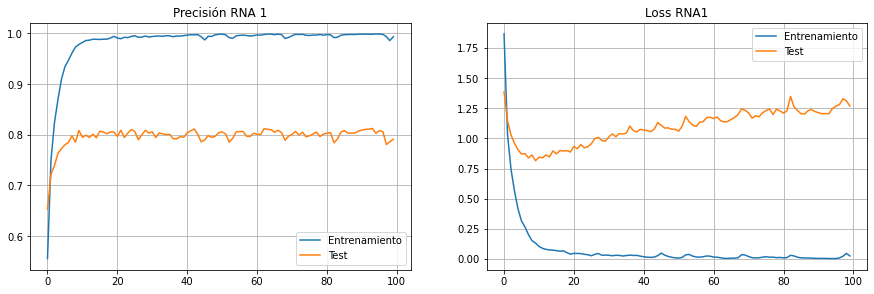

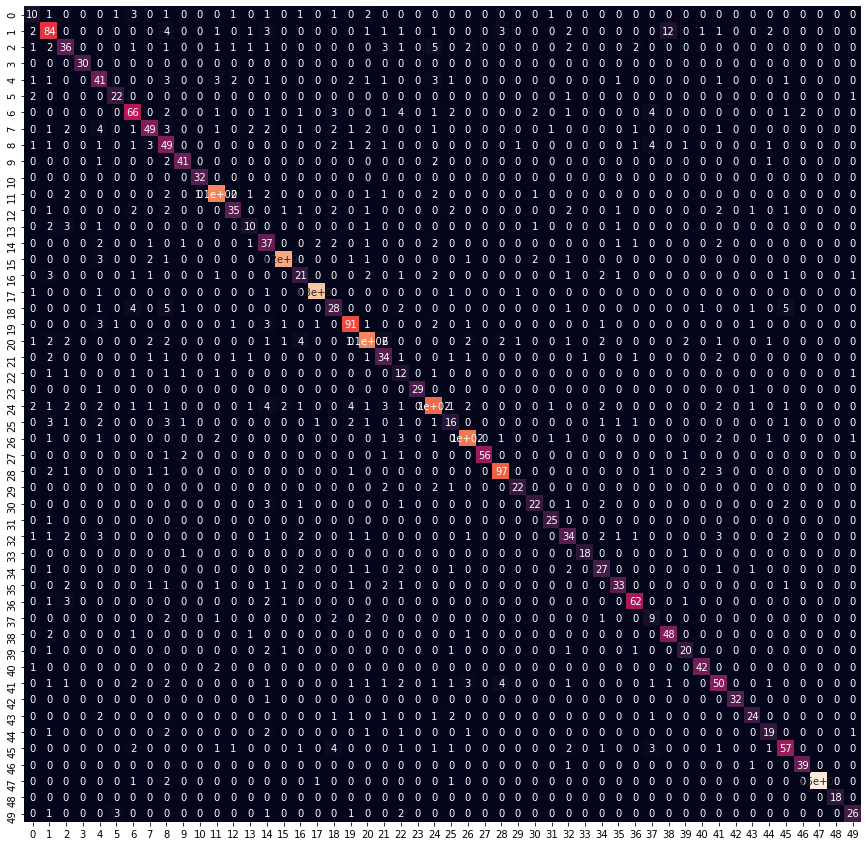

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      3000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
##Graficas RNA1
G = pp.figure(figsize = (15, 10))
gp1 = G.add_subplot(2, 2, 1)
gp1.plot(historial1.history['accuracy'])
gp1.plot(historial1.history['val_accuracy'])
gp1.set_title('Precisión RNA 1')
gp1.legend(['Entrenamiento','Test'], loc='lower right')
gp1.grid(True)


gp2 = G.add_subplot(2, 2, 2)
gp2.plot(historial1.history['loss'])
gp2.plot(historial1.history['val_loss'])
gp2.set_title('Loss RNA1')
gp2.legend(['Entrenamiento','Test'], loc='upper right')
gp2.grid(True)

filtro = G.get_window_extent().transformed(G.dpi_scale_trans.inverted())
G.savefig('RNA1.png', bbox_inches = filtro)

#Predicción
pred1 = model1_entrenado.predict(X_test,verbose=1)
pred1 = np.array(list(map(lambda m: [np.argmax(m)], pred1)))

#Matriz de confusión
matriz_confusion1 = confusion_matrix(
    pred1, 
    y_test,
)

#Graficamos la matriz
grafico_1 = pp.figure(figsize = (15,15))
sb.heatmap(matriz_confusion1, annot = True, cbar = False)
pp.show()


#Guardando la mátriz de confusión
grafico_1.savefig('MatrizConfusion1.png')

report1 = classification_report(np.argmax(y_test, axis=1), pred1)
print(report1)


In [ ]:
#Segunda propuesta de red neuronal artificial
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(3072, )),
    keras.layers.Dense(1050, activation='elu'),
    keras.layers.Dense(428, activation='sigmoid'),
    keras.layers.Dense(556, activation='softsign'),
    keras.layers.Dense(50, activation='sigmoid')
])
model2.summary()
model2_entrenado, historial2 = TEST1(model2,X_train, X_test, y_train, y_test)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1050)              3226650   
_________________________________________________________________
dense_3 (Dense)              (None, 428)               449828    
_________________________________________________________________
dense_4 (Dense)              (None, 556)               238524    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                27850     
Total params: 3,942,852
Trainable params: 3,942,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 2s 32ms/step - loss: 2.4302 - accuracy: 0.3791 - val_loss

50/50 [==============================] - 1s 27ms/step - loss: 0.2133 - accuracy: 0.9303 - val_loss: 1.1151 - val_accuracy: 0.7693
Epoch 52/100
50/50 [==============================] - 1s 28ms/step - loss: 0.2085 - accuracy: 0.9326 - val_loss: 1.0763 - val_accuracy: 0.7750
Epoch 53/100
50/50 [==============================] - 1s 28ms/step - loss: 0.1892 - accuracy: 0.9411 - val_loss: 1.0359 - val_accuracy: 0.7883
Epoch 54/100
50/50 [==============================] - 1s 27ms/step - loss: 0.1925 - accuracy: 0.9334 - val_loss: 1.1197 - val_accuracy: 0.7770
Epoch 55/100
50/50 [==============================] - 1s 27ms/step - loss: 0.1932 - accuracy: 0.9391 - val_loss: 1.0936 - val_accuracy: 0.7847
Epoch 56/100
50/50 [==============================] - 1s 27ms/step - loss: 0.1713 - accuracy: 0.9471 - val_loss: 1.1741 - val_accuracy: 0.7667
Epoch 57/100
50/50 [==============================] - 1s 27ms/step - loss: 0.1920 - accuracy: 0.9383 - val_loss: 1.1451 - val_accuracy: 0.7637
Epoch 58/100

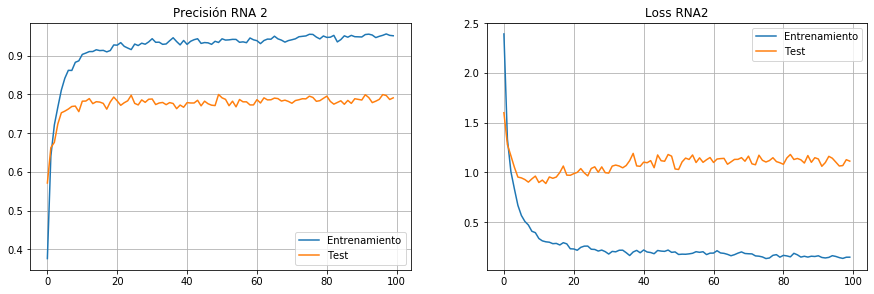

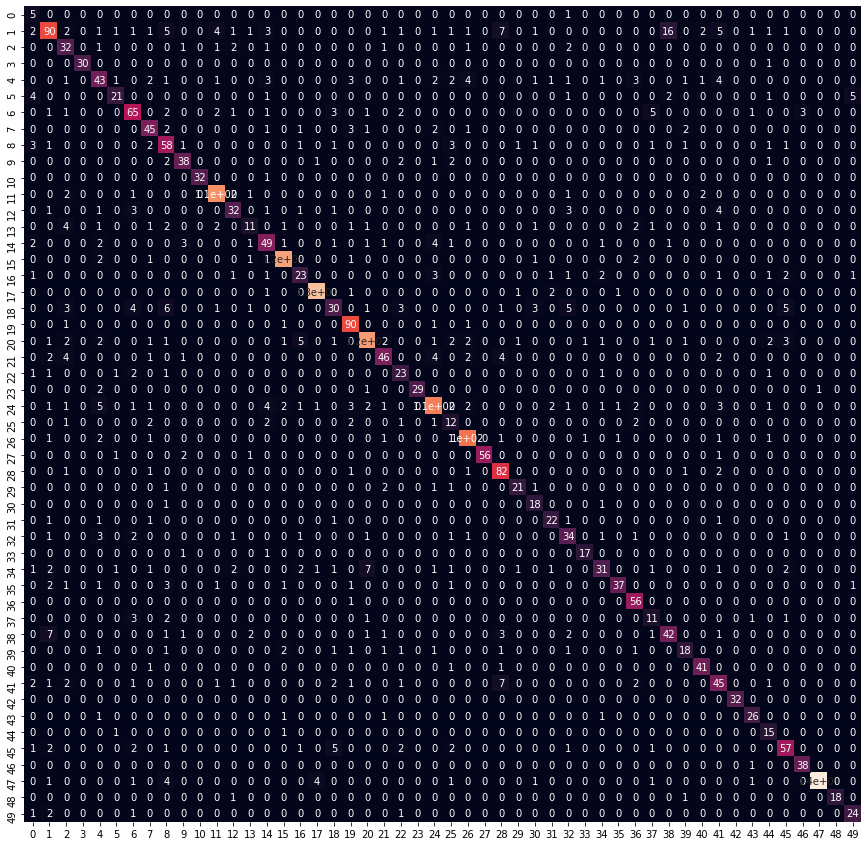

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Braulio Castro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
##Graficas RNA2
G2 = pp.figure(figsize = (15, 10))
ge1 = G2.add_subplot(2, 2, 1)
ge1.plot(historial2.history['accuracy'])
ge1.plot(historial2.history['val_accuracy'])
ge1.set_title('Precisión RNA 2')
ge1.legend(['Entrenamiento','Test'], loc='lower right')
ge1.grid(True)


ge2 = G2.add_subplot(2, 2, 2)
ge2.plot(historial2.history['loss'])
ge2.plot(historial2.history['val_loss'])
ge2.set_title('Loss RNA2')
ge2.legend(['Entrenamiento','Test'], loc='upper right')
ge2.grid(True)

filtro = G2.get_window_extent().transformed(G2.dpi_scale_trans.inverted())
G2.savefig('RNA2.png', bbox_inches = filtro)


#Predicción
pred2 = model2_entrenado.predict(X_test)
pred2 = np.array(list(map(lambda m: [np.argmax(m)], pred2)))

#Matriz de confusión
matriz_confusion2 = confusion_matrix(
    pred2, 
    y_test,
)

#Graficamos la matriz
grafico_2 = pp.figure(figsize = (15,15))
sb.heatmap(matriz_confusion2, annot = True, cbar = False)
pp.show()

#Guardando la mátriz de confusión
grafico_2.savefig('MatrizConfusion2.png')

report2 = classification_report(np.argmax(y_test, axis=1), pred2)
print(report2)

In [15]:
#Tercera propuesta de red neuronal artificial
model3 = Sequential()
model3.add(Dense(145, activation = 'exponential', input_shape = (3072, )))
model3.add(Dense(82, activation = 'exponential'))
model3.add(Dense(52, activation = 'exponential'))
model3.summary()
model3_entrenado, historial3 = TEST1(model3,X_train, X_test, y_train, y_test)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 145)               445585    
_________________________________________________________________
dense_13 (Dense)             (None, 82)                11972     
_________________________________________________________________
dense_14 (Dense)             (None, 52)                4316      
Total params: 461,873
Trainable params: 461,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0077 - val_loss: nan - val_accuracy: 0.0077
Epoch 2/100
50/50 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.0076 - val_loss: nan - val_accuracy: 0.0077
Epoch 3/100
50/50 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.0076 - val_los

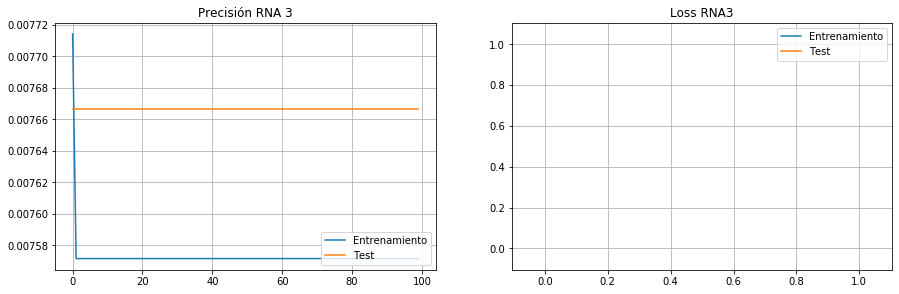

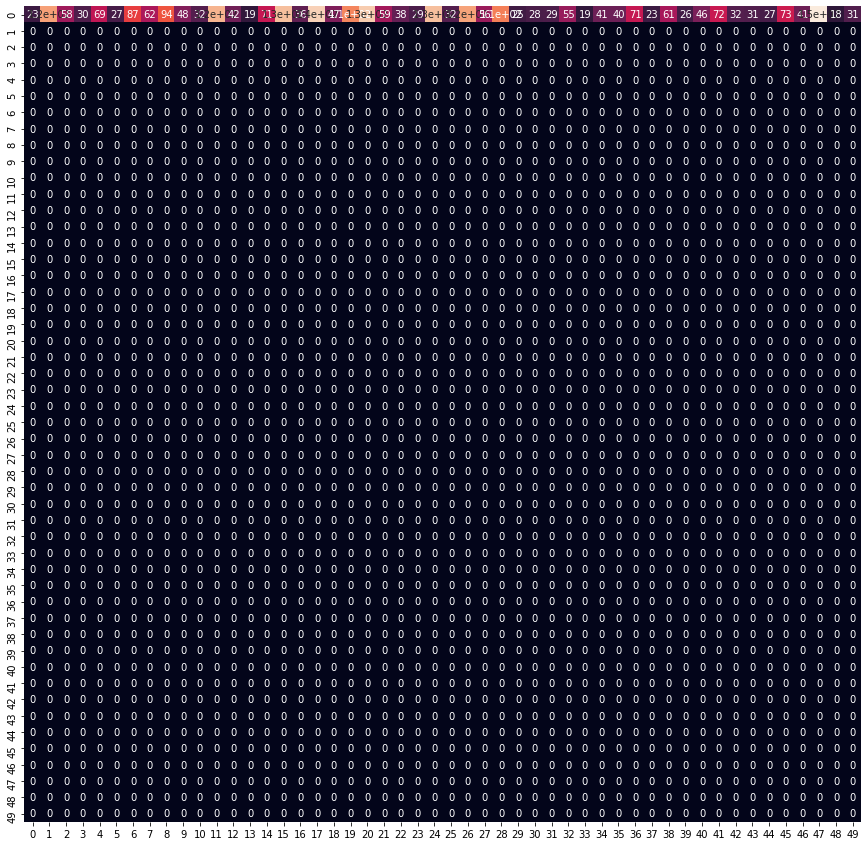

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [16]:
##Graficas RNA3
G3 = pp.figure(figsize = (15, 10))
ga1 = G3.add_subplot(2, 2, 1)
ga1.plot(historial3.history['accuracy'])
ga1.plot(historial3.history['val_accuracy'])
ga1.set_title('Precisión RNA 3')
ga1.legend(['Entrenamiento','Test'], loc='lower right')
ga1.grid(True)


ga2 = G3.add_subplot(2, 2, 2)
ga2.plot(historial3.history['loss'])
ga2.plot(historial3.history['val_loss'])
ga2.set_title('Loss RNA3')
ga2.legend(['Entrenamiento','Test'], loc='upper right')
ga2.grid(True)

filtro = G3.get_window_extent().transformed(G3.dpi_scale_trans.inverted())
G3.savefig('RNA3.png', bbox_inches = filtro)
#Predicción
pred3 = model3_entrenado.predict(X_test)
pred3 = np.array(list(map(lambda m: [np.argmax(m)], pred3)))

#Matriz de confusión
matriz_confusion3 = confusion_matrix(
    pred3, 
    y_test,
)

#Graficamos la matriz
grafico_3 = pp.figure(figsize = (15,15))
sb.heatmap(matriz_confusion3, annot = True, cbar = False)
pp.show()
#Guardando la mátriz de confusión
grafico_3.savefig('MatrizConfusio3.png')

report3 = classification_report(np.argmax(y_test, axis=1), pred3)
print(report3)

In [17]:
#Cuarta propuesta de red neuronal artificial
model4 = Sequential()
model4.add(Dense(300, activation = 'relu', input_shape = (3072, )))
model4.add(Dense(50, activation = 'sigmoid'))
model4.summary()
model4_entrenado, historial4 = TEST1(model4,X_train, X_test, y_train, y_test)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                15050     
Total params: 936,950
Trainable params: 936,950
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 2s 46ms/step - loss: 3.1862 - accuracy: 0.2369 - val_loss: 2.7608 - val_accuracy: 0.2707
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 2.2385 - accuracy: 0.4190 - val_loss: 2.3263 - val_accuracy: 0.4820
Epoch 3/100
50/50 [==============================] - 2s 39ms/step - loss: 1.5902 - accuracy: 0.6101 - val_loss: 2.0450 - val_accuracy: 0.6007
Epoch 4/100
50/50 [==============================] - 2s 36ms/step - loss: 1.2481 - a

50/50 [==============================] - 1s 16ms/step - loss: 0.3125 - accuracy: 0.9301 - val_loss: 1.7521 - val_accuracy: 0.7800
Epoch 55/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3320 - accuracy: 0.9319 - val_loss: 1.6928 - val_accuracy: 0.7833
Epoch 56/100
50/50 [==============================] - 1s 17ms/step - loss: 0.3539 - accuracy: 0.9281 - val_loss: 1.7631 - val_accuracy: 0.7710
Epoch 57/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3743 - accuracy: 0.9290 - val_loss: 1.7224 - val_accuracy: 0.7820
Epoch 58/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3290 - accuracy: 0.9354 - val_loss: 1.7873 - val_accuracy: 0.7820
Epoch 59/100
50/50 [==============================] - 1s 15ms/step - loss: 0.3077 - accuracy: 0.9381 - val_loss: 1.6781 - val_accuracy: 0.7797
Epoch 60/100
50/50 [==============================] - 1s 16ms/step - loss: 0.3159 - accuracy: 0.9344 - val_loss: 1.6006 - val_accuracy: 0.7933
Epoch 61/100

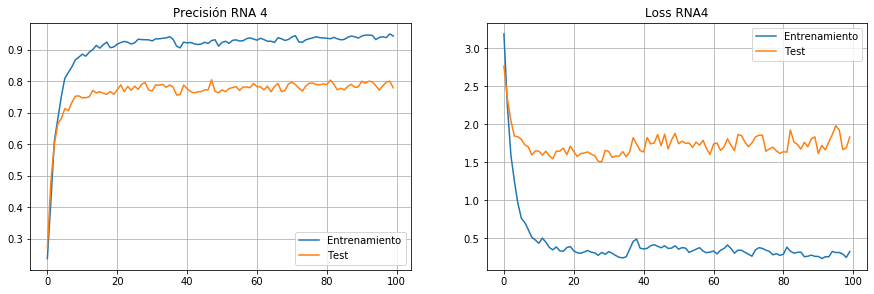

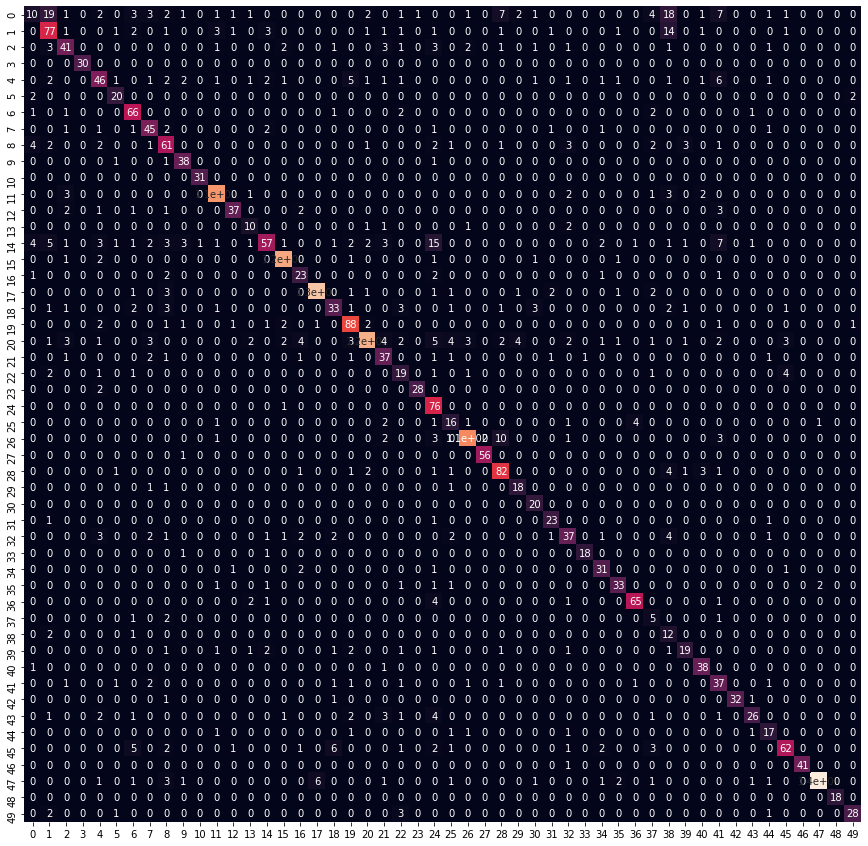

              precision    recall  f1-score   support

           0       1.00      0.03      0.06      3000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\Braulio Castro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
##Graficas RNA4
G4 = pp.figure(figsize = (15, 10))
gb1 = G4.add_subplot(2, 2, 1)
gb1.plot(historial4.history['accuracy'])
gb1.plot(historial4.history['val_accuracy'])
gb1.set_title('Precisión RNA 4')
gb1.legend(['Entrenamiento','Test'], loc='lower right')
gb1.grid(True)


gb2 = G4.add_subplot(2, 2, 2)
gb2.plot(historial4.history['loss'])
gb2.plot(historial4.history['val_loss'])
gb2.set_title('Loss RNA4')
gb2.legend(['Entrenamiento','Test'], loc='upper right')
gb2.grid(True)

filtro = G4.get_window_extent().transformed(G4.dpi_scale_trans.inverted())
G4.savefig('RNA4.png', bbox_inches = filtro)
#Predicción
pred4 = model4_entrenado.predict(X_test)
pred4 = np.array(list(map(lambda m: [np.argmax(m)], pred4)))

#Matriz de confusión
matriz_confusion = confusion_matrix(
    pred4, 
    y_test,
)

#Graficamos la matriz
grafico_4 = pp.figure(figsize = (15,15))
sb.heatmap(matriz_confusion, annot = True, cbar = False)
pp.show()

#Guardando la mátriz de confusión
grafico_4.savefig('MatrizConfusion4.png')
report4 = classification_report(np.argmax(y_test, axis=1), pred4)
print(report4)

In [19]:
model1.save("entrenamiento1.h5")
model2.save("entrenamiento2.h5")
model3.save("entrenamiento3.h5")
model4.save("entrenamiento4.h5")

# Función para realizar la prueba (test) con un conjunto de datos, en base a un directorio que se le pase (con la misma estructura de directorios que se le facilitaron para el entrenamiento)

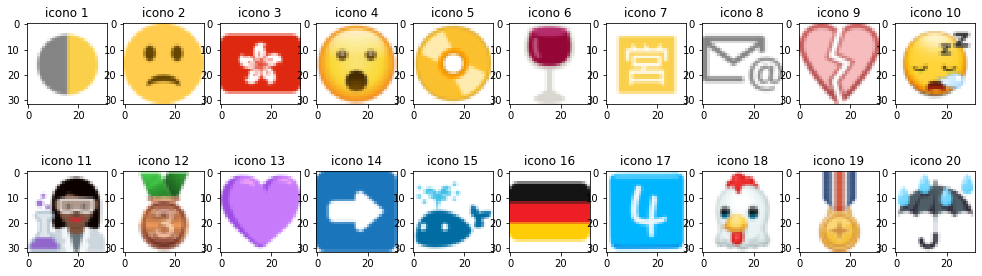

1/1 [==============================] - 0s 0s/step - loss: 12.4361 - accuracy: 0.0000e+00


{'loss': 12.436117172241211, 'accuracy': 0.0}

In [36]:
prueba = pd.read_csv('prueba.data', sep = ',')
#Datos Aleatorios 
muestras = prueba.sample(n = 20)

x = np.array(muestras.iloc[:, 0:3072])
y = np.array(muestras.iloc[:, -1])

#imagenes
grafico = pp.figure(figsize = (17, 5))
i = 1
for imagen in x:
    #Gráficos
    parte = grafico.add_subplot(2, 10, i)
    parte.set_title('icono ' + str(i))
    #1D a 3D
    imagen = np.reshape(imagen, (-1, 32, 32))
    imagen = np.rollaxis(imagen, 0, 3)
    pp.imshow(imagen)
    i += 1

pp.show()


resultados = model1_entrenado.evaluate(x, y, return_dict = True)
resultados

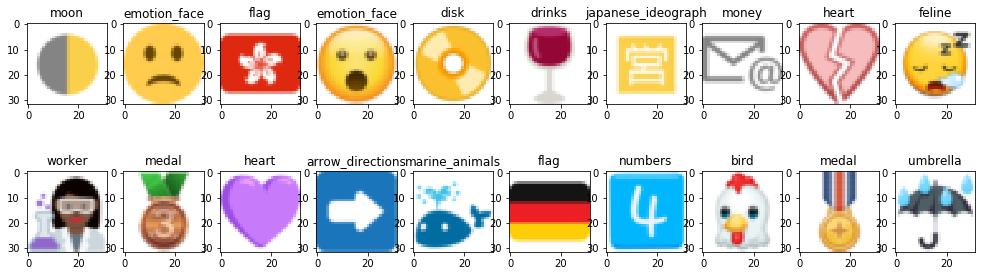

In [37]:
imagenes = np.array(x)

#Escalamos la muestra
x = escalador.fit_transform(x)

#Realizamos la predicción
predicciones = model1_entrenado.predict(x)

y_prediccion = np.array(list(map(lambda m: [np.argmax(m)], predicciones)))

#Mostramos las imágenes y sus predicciones
grafico = pp.figure(figsize = (17, 5))

i = 1
for muestra in imagenes:
    #Gráfico del modelo 1
    parte = grafico.add_subplot(2, 10, i)
    parte.set_title(listaCategorias[int(y_prediccion[i - 1])])
    
    #Convertimos el arreglo 1D a uno en 3D
    muestra = np.reshape(muestra, (-1, 32, 32))
    muestra = np.rollaxis(muestra, 0, 3)

    #Mostramos la imágen de ejemplo
    pp.imshow(muestra)
    i += 1

pp.show()

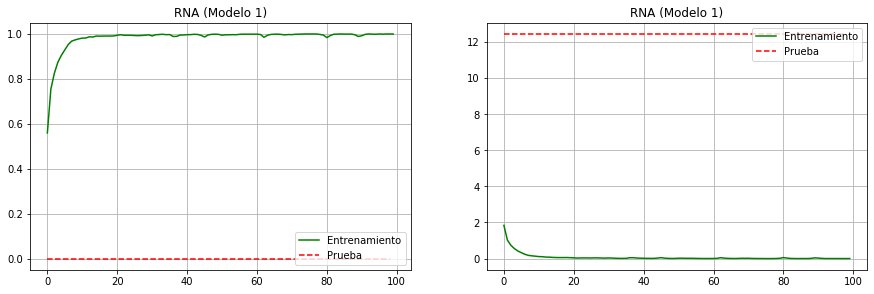

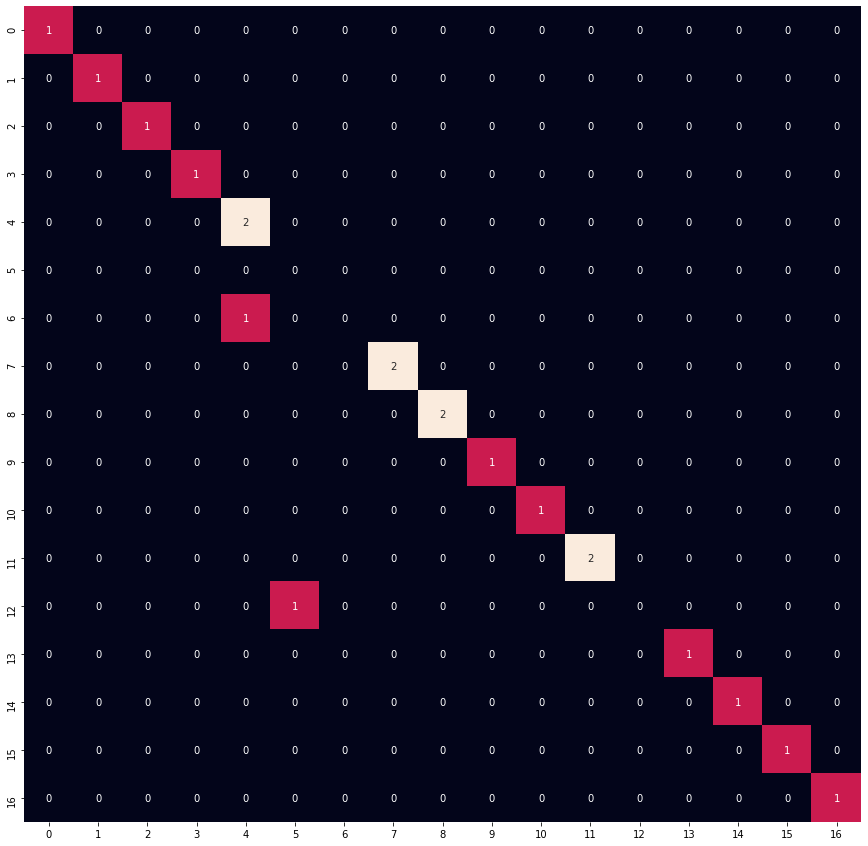

In [38]:
#Valores
rango_x = range(0, 99)
rango_y = []
rango_y.extend(repeat(resultados['accuracy'], 99))

#Realizamos la gráfica
G5 = pp.figure(figsize = (15, 10))
g1 = G5.add_subplot(2, 2, 1)
g1.set_title('RNA (Modelo 1)')
g1.plot(historial1.history['accuracy'], color = 'green')
g1.plot(rango_x, rango_y, linestyle = 'dashed',color = 'red')
g1.legend(['Entrenamiento', 'Prueba'], loc = 'lower right')
g1.grid(True)


rango_xx = range(0, 99)
rango_yy = []
rango_yy.extend(repeat(resultados['loss'], 99))

#Realizamos la gráfica
g2 = G5.add_subplot(2, 2, 2)
g2.set_title('RNA (Modelo 1)')
g2.plot(historial1.history['loss'], color = 'green')
g2.plot(rango_xx, rango_yy, linestyle = 'dashed',color = 'red')
g2.legend(['Entrenamiento', 'Prueba'], loc = 'upper right')
g2.grid(True)

filtro = G5.get_window_extent().transformed(G5.dpi_scale_trans.inverted())
G4.savefig('PRUEBA.jpg', bbox_inches = filtro)

matriz_confusion = confusion_matrix(
    y_prediccion, 
    y,
)

#Graficamos la matriz
grafico_c = pp.figure(figsize = (15,15))
sb.heatmap(matriz_confusion, annot = True, cbar = False)
grafico_c.savefig('MatrizConfusion-Prueba.jpg')
pp.show()

In [45]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

pdf = PdfPages('Reporte1.pdf')
pdf.savefig(G)
pdf.savefig(grafico_1)
pdf.savefig(G2)
pdf.savefig(grafico_2)
pdf.savefig(G3)
pdf.savefig(grafico_3)
pdf.savefig(G4)
pdf.savefig(grafico_4)
pdf.close()

pdf = PdfPages('Reporte2.pdf')
pdf.savefig(G5)
pdf.savefig(grafico_c)
pdf.close()

### CONV2D - Complemento

In [2]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), use_bias=True, activation='relu',padding='same', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters=32, kernel_size=2, use_bias=True, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
          
model.add(Conv2D(filters=64, kernel_size=2, use_bias=True, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.5))
        
model.add(Conv2D(filters=128, kernel_size=2, use_bias=True, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.5))  
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(46, activation='softmax'))          
#model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
historial = model.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs = 30, batch_size = 64)

In [ ]:
y_predecido = model.predict(X_test)
predecidos = list()
for i in range(len(y_predecido)):
    predecidos.append(np.argmax(y_predecido[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

#comparamos lo que predijo la red contra las salidas deseadas
precision = accuracy_score(predecidos, test)
print('Precision: ', (precision*100))
print(predecidos[992])